Pineapple - Robot Shop Pattern 1 

In [3]:
# Required Imports 
import pandas as pd 
import numpy as np 
import os 
import matplotlib.pyplot as plt
import json
import datetime, time
from matplotlib.dates import date2num
# import seaborn as sns

In [4]:
# https://stackoverflow.com/a/1879011/14626757
# Returns a walked path under collected_data
def f(starting_path):
  alld = {'': {}}

  for dirpath, dirnames, filenames in os.walk(starting_path):
    d = alld
    dirpath = dirpath[len(starting_path):]
    for subd in dirpath.split(os.sep):
      based = d
      d = d[subd]
    if dirnames:
      for dn in dirnames:
        d[dn] = {}
    else:
      based[subd] = filenames
  return alld['']

In [13]:
# standard code to convert data to a timestamp, metric list 
def convert_enddate_to_seconds(ts):
    """Takes ISO 8601 format(string) and converts into epoch time."""
    dt = datetime.datetime.strptime(ts[:-7],'%Y-%m-%dT%H:%M:%S')+\
                datetime.timedelta(hours=int(ts[-5:-3]),
                minutes=int(ts[-2:]))*int(ts[-6:-5]+'1')
    seconds = time.mktime(dt.timetuple()) + dt.microsecond/1000000.0
    return seconds

def convert_to_json(filename):
    # Opening JSON file
    f = open(filename)
    
    # returns JSON object as
    # a dictionary
    data = json.load(f)

    # Closing file
    f.close()
    return data

# returns 2 lists for average values, and timestamp
def get_list(timeseries):
    y = [val['average'] for val in timeseries]
    x = [pd.to_datetime(convert_enddate_to_seconds(val['timeStamp']),unit='s') for val in timeseries]
    return x,y

# 
def return_time_metric(filename):
    data = convert_to_json(filename)
    timespan = data['timespan']
    time_interval = data['interval']
    value = data['value'][0]
    name_of_graph = value['name']['value']
    timeseries = value['timeseries'][0]['data']
    x, y = get_list(timeseries)
    return x,y

def create_graph(x,y,):
    # def clean_plot(data, metric):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    
    ax.plot(x, y)   # 2021-12-31T18:36:00+00:00 2021-12-31T19:05:00+00:00


    Timestamp  User Count Type                                Name  \
0  1644683354           0  NaN                          Aggregated   
1  1644683355          10  GET                                   /   
2  1644683355          10  GET     /api/cart/add/anonymous-3/UHJ/1   
3  1644683355          10  GET  /api/cart/add/anonymous-3/Watson/1   
4  1644683355          10  GET     /api/cart/add/anonymous-4/EMM/1   

   Requests/s  Failures/s  50%  66%  75%  80%  ...  99.9%  99.99%  100%  \
0         0.0         0.0  NaN  NaN  NaN  NaN  ...    NaN     NaN   NaN   
1         0.0         0.0  0.0  0.0  0.0  0.0  ...    0.0     0.0   0.0   
2         0.0         0.0  0.0  0.0  0.0  0.0  ...    0.0     0.0   0.0   
3         0.0         0.0  0.0  0.0  0.0  0.0  ...    0.0     0.0   0.0   
4         0.0         0.0  0.0  0.0  0.0  0.0  ...    0.0     0.0   0.0   

   Total Request Count  Total Failure Count  Total Median Response Time  \
0                    0                    0          

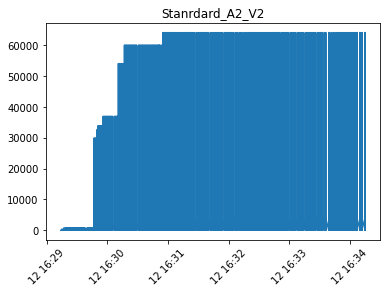

{'Stanrdard_A2_V2': {'a': ['loaded_failures.csv', 'loaded_exceptions.csv', 'loaded_stats_history.csv', 'loaded_stats.csv']}}


In [25]:
# This run only lasted 5 minutes
filepath = "./load5"
api      = os.path.join(filepath, "api")

api_listing     = f(api)
big_api = {}
# Get all values
for size, iteration in api_listing.items():

    df_list = list()
    for iteration, files in iteration.items(): 
        temp_path = os.path.join(api, size, iteration)
        file_name = "loaded_stats_history.csv"
        df = pd.read_csv(os.path.join(temp_path, file_name))
        print(df.head())
        df['Timestamp']= pd.to_datetime(df['Timestamp'] ,unit='s')
        df_list.append(df)
        
    big_api[size] =  df_list

# average metrics
for key, values in big_api.items():
    convert_to_df = {}
    for i in range(0, len(values)):
        
        timestamp =  values[i]["Timestamp"]
        plt.plot(timestamp, values[i]["Total Average Response Time"]) 
        plt.title(key)
        plt.xticks(rotation=45)
    plt.show()

print(api_listing)

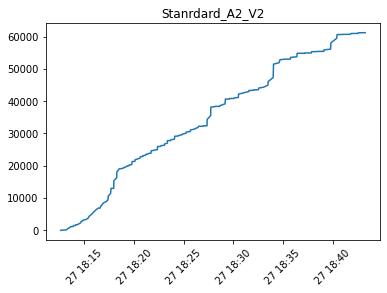

{'Stanrdard_A2_V2': {'a': ['load_exceptions.csv', 'load_failures.csv', 'load_stats_history.csv', 'load_stats.csv']}}


In [24]:
# This is from the original runs which lasted 30 minutes
filepath = "./load30"
api      = os.path.join(filepath, "api")

api_listing     = f(api)
big_api = {}
# Get all values
for size, iteration in api_listing.items():

    df_list = list()
    for iteration, files in iteration.items(): 
        temp_path = os.path.join(api, size, iteration)
        file_name = "load_stats_history.csv"
        df = pd.read_csv(os.path.join(temp_path, file_name))
        df['Timestamp']= pd.to_datetime(df['Timestamp'] ,unit='s')
        df_list.append(df)
        
    big_api[size] =  df_list

# average metrics
for key, values in big_api.items():
    convert_to_df = {}
    for i in range(0, len(values)):
        
        timestamp =  values[i]["Timestamp"]
        plt.plot(timestamp, values[i]["Total Average Response Time"]) 
        plt.title(key)
        plt.xticks(rotation=45)
    plt.show()

print(api_listing)